In [1]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import glob

In [8]:
seed = 42
np.random.seed = seed

In [9]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [10]:
TRAIN_PATH =  "C:/Users/RAZER/Downloads/dataset/HAM/train/"
TEST_PATH = "C:/Users/RAZER/Downloads/dataset/HAM/test/"

train_images_list = sorted(glob.glob(TRAIN_PATH+"/images/*"))
train_mask_list = sorted(glob.glob(TRAIN_PATH+"/mask/*"))
test_images_list = sorted(glob.glob(TEST_PATH+"/images/*"))
test_mask_list = sorted(glob.glob(TEST_PATH+"/mask/*"))


train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [11]:
for i in range(10):
    print(train_images_list[i],train_mask_list[i])

C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024306.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024306_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024308.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024308_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024309.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024309_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024319.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024319_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024320.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024320_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024322.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\ISIC_0024322_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/train//images\ISIC_0024323.jpg C:/Users/RAZER/Downloads/dataset/HAM/train//mask\I

In [12]:
for i in range(10):
    print(test_images_list[i],test_mask_list[i])

C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024307.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024307_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024310.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024310_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024311.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024311_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024312.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024312_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024313.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024313_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024314.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024314_segmentation.png
C:/Users/RAZER/Downloads/dataset/HAM/test//images\ISIC_0024315.jpg C:/Users/RAZER/Downloads/dataset/HAM/test//mask\ISIC_0024315_se

In [13]:
print(len(train_images_list),len(train_mask_list),len(test_images_list),len(test_mask_list))

8012 8012 2003 2003


In [14]:
l_train = len(train_images_list)
l_test = len(test_images_list)

In [15]:
X_train = np.zeros((l_train, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train =np.zeros((l_train, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
X_test = np.zeros((l_test, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((l_test, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)

In [16]:
Y_train.shape

(8012, 128, 128, 1)

#Resizing Images

**Train Images**

In [ ]:
#sizes_train_mask = []
n = 0
print('Resizing test images') 
for path in tqdm(train_images_list):
    img = imread(pathas_gray=True)[:,:,:IMG_CHANNELS]
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    n+=1

print('Done!')

**Train Mask**

In [12]:

#sizes_train_mask = []
n = 0
print('Resizing train mask') 
for path in tqdm(train_mask_list):
    img = imread(path)
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img =  resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
    Y_train[n] = img
    n+=1

print('Done!')

Resizing train mask


100%|██████████| 8012/8012 [00:58<00:00, 137.10it/s]

Done!


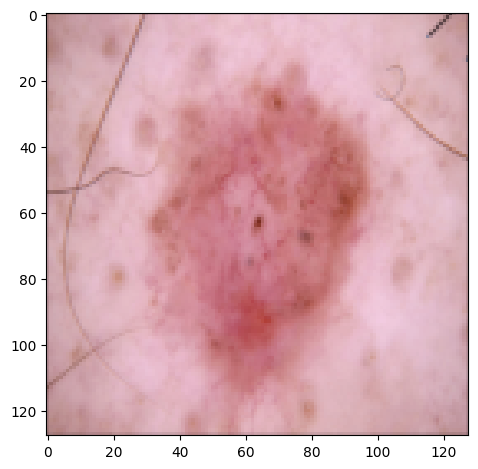

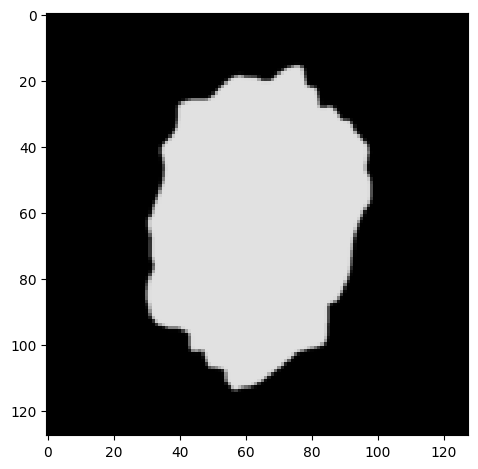

In [13]:
image_x = 10
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

**Test Images**                     

In [14]:
#sizes_train_mask = []
n = 0
print('Resizing test images') 
for path in tqdm(test_images_list):
    img = imread(path)[:,:,:IMG_CHANNELS]
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img
    n+=1

print('Done!')

Resizing test images


100%|██████████| 2003/2003 [00:38<00:00, 52.66it/s]

Done!


**Test Mask**

In [15]:
#sizes_train_mask = []
n = 0
print('Resizing test images') 
for path in tqdm(test_mask_list):
    img = imread(path)
    #sizes_train_mask.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
    Y_test[n] = img
    n+=1

print('Done!')

Resizing test images


100%|██████████| 2003/2003 [00:17<00:00, 117.32it/s]

Done!


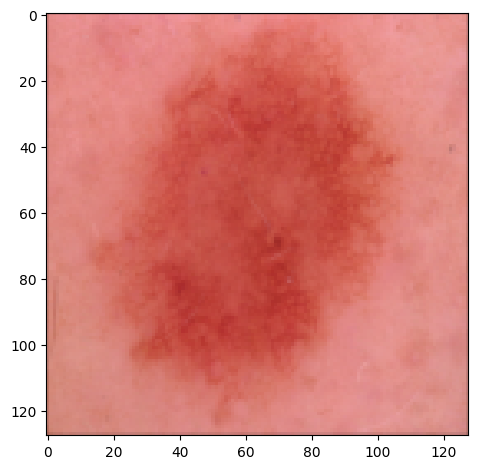

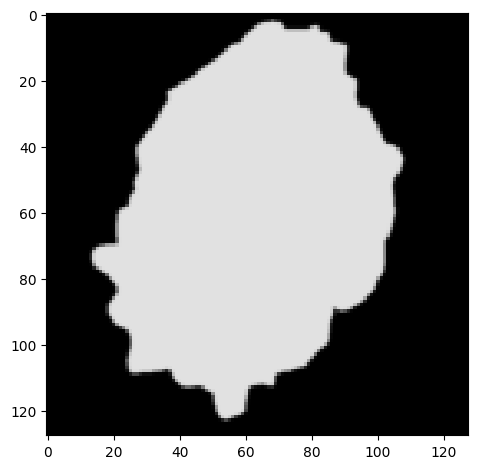

In [16]:
image_x = 7
imshow(X_test[image_x])
plt.show()
imshow(np.squeeze(Y_test[image_x]))
plt.show()

In [17]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8012, 128, 128, 3),
 (2003, 128, 128, 3),
 (8012, 128, 128, 1),
 (2003, 128, 128, 1))

In [18]:
X_train, X_test = X_train / 255.0, X_test / 255.0

#U net Architecture

In [29]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)



#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)


c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)


c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)



c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)


c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)







#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)


u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)


u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)


u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)




outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)




model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_6 (Lambda)              (None, 128, 128, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv2d_114 (Conv2D)            (None, 128, 128, 16  448         ['lambda_6[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]


results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

In [21]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


63/63 [==============================] - 14s 223ms/step


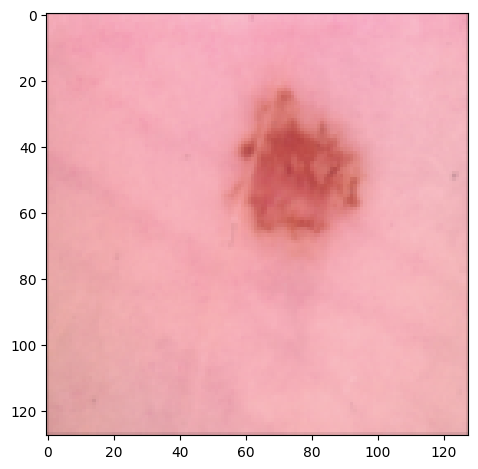

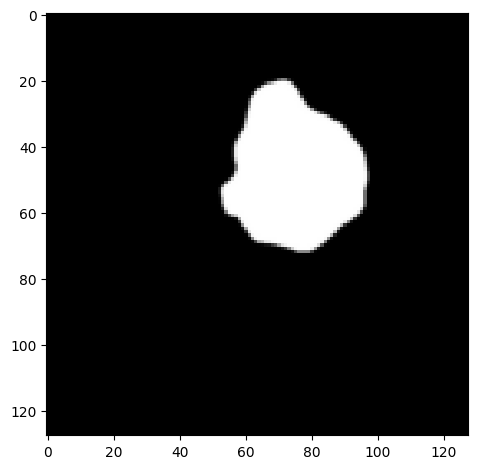

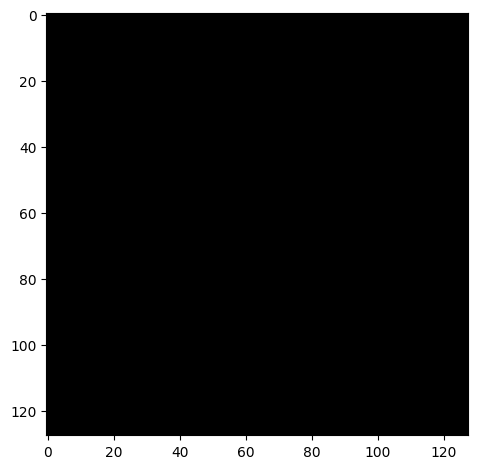

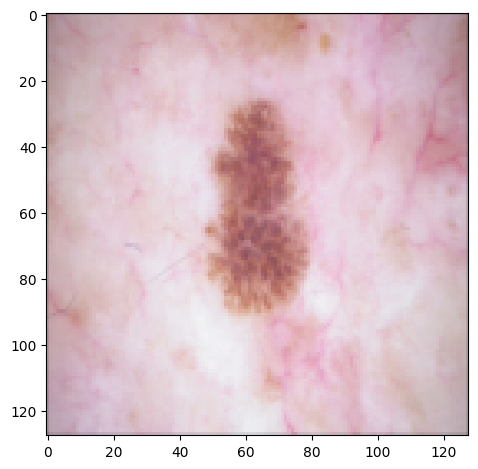

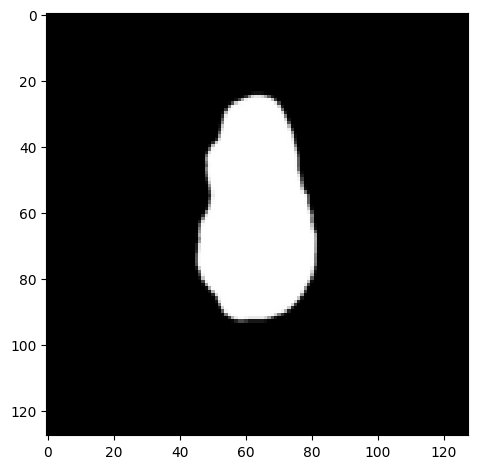

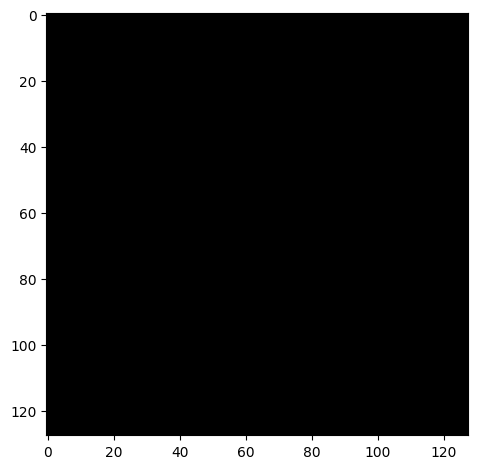

In [22]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()